# MAKİNE ÖĞRENMESİ MODELLERİ İLE TÜRKİYE COVID19 VAKA TAHMİNLEMESİ

In [1]:
import pandas as pd
import numpy as np
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
import csv

# Güncel Veri Çekme

In [2]:
%%time
tarih=[]
toplam_test=[]
toplam_vaka=[]
toplam_vefat=[]
pneumonia=[]
agir_hasta=[]
iyilesen=[]
bugun_vaka=[]
bugun_hasta=[]
bugun_test=[]
bugun_vefat=[]
bugun_iyilesen=[]


#options = webdriver.ChromeOptions()
#options.binary_location = "C:\Program Files\Google\Chrome\Application\chrome.exe"
#chrome_driver_binary = r"C:\Users\Nafiz\Python\chromedriver_win32\chromedriver.exe"
#driver = webdriver.Chrome(chrome_driver_binary, options=options)
driver = webdriver.Chrome(ChromeDriverManager().install())

base_url = str("https://covid19.saglik.gov.tr/TR-66935/genel-koronavirus-tablosu.html")
driver.get(base_url)

rows = 1 + len(driver.find_elements_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr"))


tables = WebDriverWait(driver,20).until(EC.presence_of_all_elements_located((By.XPATH,"//*[@id='TumVerileriGetir']")))

for table in tables:

    for r in range(1, rows):
        
        tarih.append(
            driver.find_element_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[1]").get_attribute('textContent').strip())

        toplam_test.append(
            driver.find_element_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[2]").get_attribute('textContent').strip())

        toplam_vaka.append(
            driver.find_element_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[3]").get_attribute('textContent').strip())
        
        toplam_vefat.append(
            driver.find_element_by_xpath("/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[4]").get_attribute('textContent').strip())
        
        pneumonia.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[5]").get_attribute('textContent').strip())
        
        agir_hasta.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[6]").get_attribute('textContent').strip())
        
        iyilesen.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[7]").get_attribute('textContent').strip())
        
        bugun_vaka.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[8]").get_attribute('textContent').strip())
        
        bugun_hasta.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[9]").get_attribute('textContent').strip())
        
        bugun_test.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[10]").get_attribute('textContent').strip())
        
        bugun_vefat.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[11]").get_attribute('textContent').strip())
        
        bugun_iyilesen.append(
            driver.find_element_by_xpath(
                "/html/body/div[1]/section[2]/div/table/tbody/tr[" + str(r) + "]/td[12]").get_attribute('textContent').strip())



df = pd.DataFrame({"Tarih":tarih, 
                   "Toplam Test Sayısı":toplam_test, 
                   "Toplam Vaka Sayısı":toplam_vaka, 
                   "Toplam Vefat Sayısı":toplam_vefat,
                   "Hastalarda Zatürre Oranı (%)":pneumonia, 
                   "Ağır Hasta Sayısı":agir_hasta, 
                   "Toplam İyileşen Hasta Sayısı": iyilesen, 
                   "Bugünkü Vaka Sayısı": bugun_vaka,
                   "Bugünkü Hasta Sayısı":bugun_hasta, 
                   "Bugünkü Test Sayısı":bugun_test, 
                   "Bugünkü Vefat Sayısı":bugun_vefat, 
                   "Bugünkü İyileşen Sayısı":bugun_iyilesen})



====== WebDriver manager ======
Current google-chrome version is 90.0.4430
Get LATEST driver version for 90.0.4430
Driver [C:\Users\Nafiz\.wdm\drivers\chromedriver\win32\90.0.4430.24\chromedriver.exe] found in cache


Wall time: 1min 55s


In [3]:
df.to_excel("covid19_data.xlsx", index=False, encoding="utf-8-sig")

In [4]:
csv = 'covid19_data.xlsx'
covid_tr = pd.read_excel(csv, thousands=".")
df = covid_tr.copy()    

# Veri İnceleme

In [5]:
df.head()

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,3 MAYIS 2021,47987986.0,4900121,41191.0,"3,2",3438.0,4515819.0,24733.0,2501.0,243648.0,347.0,35438.0
1,2 MAYIS 2021,47744338.0,4875388,40844.0,"2,4",3532.0,4480381.0,25980.0,2587.0,240145.0,340.0,75182.0
2,1 MAYIS 2021,47504193.0,4849408,40504.0,"2,4",3525.0,4405199.0,28817.0,2615.0,242194.0,373.0,81302.0
3,30 NİSAN 2021,47261999.0,4820591,40131.0,"2,4",3534.0,4323897.0,31891.0,2673.0,265287.0,394.0,68183.0
4,29 NİSAN 2021,46996712.0,4788700,39737.0,"2,4",3581.0,4255714.0,37674.0,2715.0,278108.0,339.0,43253.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tarih                         419 non-null    object 
 1   Toplam Test Sayısı            403 non-null    float64
 2   Toplam Vaka Sayısı            419 non-null    int64  
 3   Toplam Vefat Sayısı           413 non-null    float64
 4   Hastalarda Zatürre Oranı (%)  279 non-null    object 
 5   Ağır Hasta Sayısı             279 non-null    float64
 6   Toplam İyileşen Hasta Sayısı  403 non-null    float64
 7   Bugünkü Vaka Sayısı           160 non-null    float64
 8   Bugünkü Hasta Sayısı          403 non-null    float64
 9   Bugünkü Test Sayısı           403 non-null    float64
 10  Bugünkü Vefat Sayısı          403 non-null    float64
 11  Bugünkü İyileşen Sayısı       395 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 39.4+ KB


In [7]:
df.isnull().sum()

Tarih                             0
Toplam Test Sayısı               16
Toplam Vaka Sayısı                0
Toplam Vefat Sayısı               6
Hastalarda Zatürre Oranı (%)    140
Ağır Hasta Sayısı               140
Toplam İyileşen Hasta Sayısı     16
Bugünkü Vaka Sayısı             259
Bugünkü Hasta Sayısı             16
Bugünkü Test Sayısı              16
Bugünkü Vefat Sayısı             16
Bugünkü İyileşen Sayısı          24
dtype: int64

# Data Tipi Değiştirme ve Eksik Verileri Doldurma

In [8]:
df["Toplam Test Sayısı"] = df["Toplam Test Sayısı"].fillna(0).astype(int)
df["Toplam Vaka Sayısı"] = df["Toplam Vaka Sayısı"].fillna(0).astype(int)

df["Toplam Vefat Sayısı"] = df["Toplam Vefat Sayısı"].fillna(0).astype(int)

df["Hastalarda Zatürre Oranı (%)"] = df["Hastalarda Zatürre Oranı (%)"].str.replace(',', '.', regex=True).fillna(0).astype(float)

df["Ağır Hasta Sayısı"] = df["Ağır Hasta Sayısı"].fillna(0).astype(int)

df["Toplam İyileşen Hasta Sayısı"] = df["Toplam İyileşen Hasta Sayısı"].fillna(0).astype(int)

df["Bugünkü Vaka Sayısı"] = df["Bugünkü Vaka Sayısı"].fillna(0).astype(int)
df["Bugünkü Hasta Sayısı"] = df["Bugünkü Hasta Sayısı"].fillna(0).astype(int)
df["Bugünkü Test Sayısı"] = df["Bugünkü Test Sayısı"].fillna(0).astype(int)
df["Bugünkü Vefat Sayısı"] = df["Bugünkü Vefat Sayısı"].fillna(0).astype(int)
df["Bugünkü İyileşen Sayısı"] = df["Bugünkü İyileşen Sayısı"].fillna(0).astype(int)

## Tarih

In [9]:
months = {'monthStr':  [' OCAK ', ' ŞUBAT ', ' MART ', ' NİSAN ', ' MAYIS ', ' HAZİRAN ', ' TEMMUZ ', ' AĞUSTOS ',' EYLÜL ',' EKİM ', ' KASIM ', ' ARALIK '],
          'monthInt': ['-01-','-02-','-03-','-04-','-05-','-06-','-07-','-08-','-09-','-10-','-11-','-12-']
         }
for i, j in df.iterrows():
    for k in range(12):
        df["Tarih"].loc[i] = df["Tarih"].loc[i].replace(months["monthStr"][k], months["monthInt"][k])

D:\C\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
import datetime

def date_convert(date_to_convert):
     return datetime.datetime.strptime(date_to_convert, "%d-%m-%Y").strftime("%Y-%m-%d")
    
df['Tarih'] = df['Tarih'].apply(date_convert)

In [11]:
df = df[::-1].reset_index(drop=True)

df['Tarih'] = pd.to_datetime(df['Tarih'], format='%Y-%m-%d')

df['Tarih'] = pd.to_datetime(df['Tarih']).dt.date

## Günlük Vaka Sayısı Doldurulması

In [12]:
for i in range(len(df[:259])):
    if(i == 0):
        df["Bugünkü Vaka Sayısı"].loc[i] = 1
    else:
        a = df["Toplam Vaka Sayısı"].loc[i+1] - df["Toplam Vaka Sayısı"].loc[i]
        df["Bugünkü Vaka Sayısı"].loc[i+1] = a

In [13]:
df.head()

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,2020-03-11,0,1,0,0.0,0,0,1,0,0,0,0
1,2020-03-12,0,1,0,0.0,0,0,0,0,0,0,0
2,2020-03-13,0,5,0,0.0,0,0,4,0,0,0,0
3,2020-03-14,0,6,0,0.0,0,0,1,0,0,0,0
4,2020-03-15,0,18,0,0.0,0,0,12,0,0,0,0


# Görselleştirmeler

In [14]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib.dates import DateFormatter

In [15]:
new_df = df.copy()
new_df.index = new_df["Tarih"]
new_df.index = pd.DatetimeIndex(new_df.index)
new_df.drop(["Tarih"], axis=1, inplace=True)

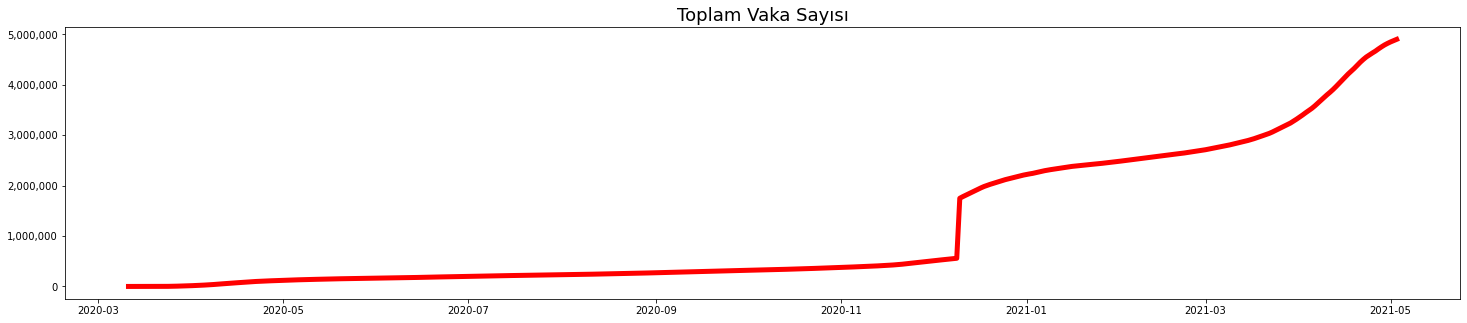

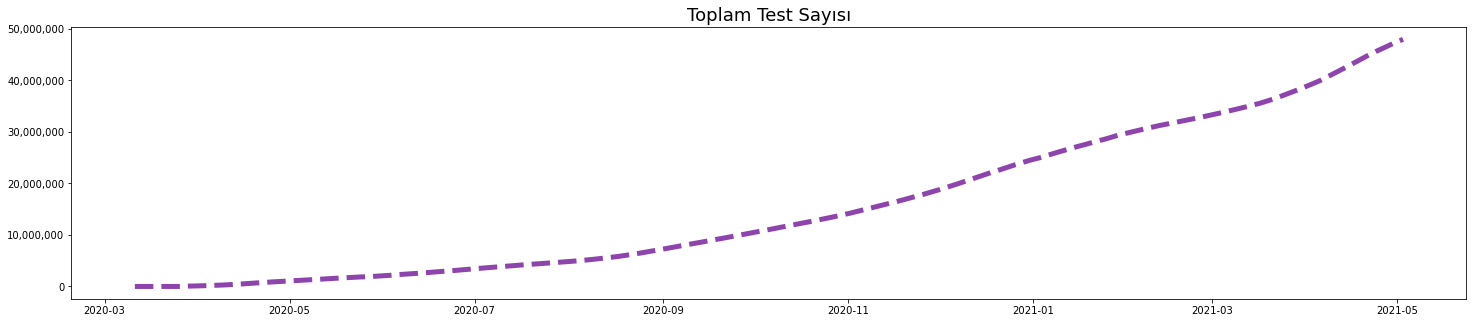

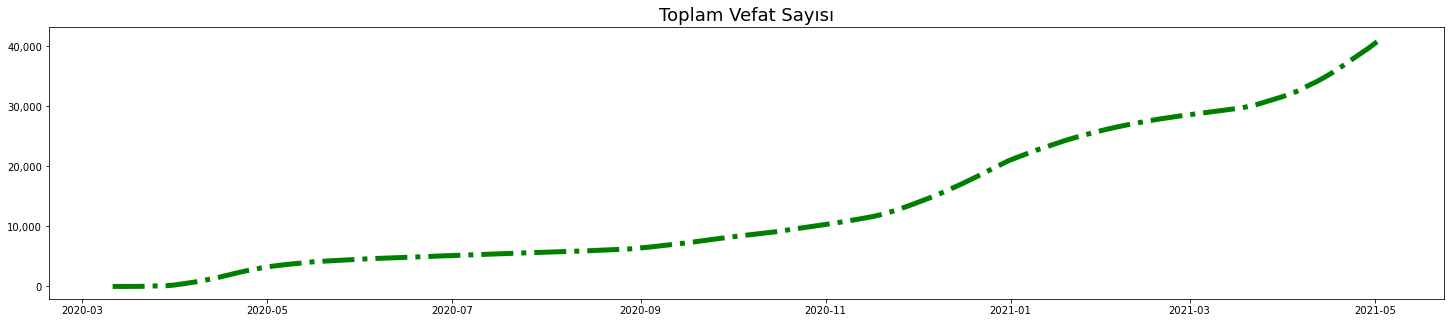

In [16]:
list_select=["Toplam Vaka Sayısı", "Toplam Test Sayısı", "Toplam Vefat Sayısı"]

fig, ax = plt.subplots(figsize=(25,5))
plt.title("Toplam Vaka Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Vaka Sayısı"],lw=5,color="#FF0000")


fig, ax = plt.subplots(figsize=(25,5))
plt.title("Toplam Test Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Test Sayısı"],"--",lw=5,color="#8E44AD")


fig, ax = plt.subplots(figsize=(25,5))
plt.title("Toplam Vefat Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Vefat Sayısı"],"-.",lw=5,color="#008000")

# MODELLER

## SARIMAX

In [17]:
from statsmodels.tsa.stattools import adfuller
def testStationarity(ts):
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

In [18]:
print("Bugünkü Vaka Sayısı")
print(testStationarity(new_df["Bugünkü Vaka Sayısı"]))

print("Bugünkü Hasta Sayısı")
print(testStationarity(new_df["Bugünkü Hasta Sayısı"]))

print("Bugünkü Vefat Sayısı")
print(testStationarity(new_df["Bugünkü Vefat Sayısı"]))

Bugünkü Vaka Sayısı
Test Statistic                  -2.236266
p-value                          0.193347
#Lags Used                      17.000000
Number of Observations Used    401.000000
Critical Value (1%)             -3.446763
Critical Value (5%)             -2.868775
Critical Value (10%)            -2.570624
dtype: float64
Bugünkü Hasta Sayısı
Test Statistic                  -2.794521
p-value                          0.059061
#Lags Used                      18.000000
Number of Observations Used    400.000000
Critical Value (1%)             -3.446804
Critical Value (5%)             -2.868793
Critical Value (10%)            -2.570634
dtype: float64
Bugünkü Vefat Sayısı
Test Statistic                  -2.643271
p-value                          0.084380
#Lags Used                      15.000000
Number of Observations Used    403.000000
Critical Value (1%)             -3.446681
Critical Value (5%)             -2.868739
Critical Value (10%)            -2.570605
dtype: float64


In [19]:
df.corr()

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
Toplam Test Sayısı,1.000000,0.962160,0.993714,-0.128795,0.596656,0.961396,0.757813,0.052493,0.896627,0.742391,0.745228
Toplam Vaka Sayısı,0.962160,1.000000,0.977356,-0.243079,0.473361,0.996602,0.766243,-0.046305,0.827301,0.751677,0.821509
Toplam Vefat Sayısı,0.993714,0.977356,1.000000,-0.174710,0.535926,0.978723,0.739123,-0.007786,0.863265,0.721606,0.748053
Hastalarda Zatürre Oranı (%),-0.128795,-0.243079,-0.174710,1.000000,0.008066,-0.240232,-0.238293,-0.074110,0.001747,-0.178683,-0.216459
Ağır Hasta Sayısı,0.596656,0.473361,0.535926,0.008066,1.000000,0.451034,0.623914,0.644949,0.782134,0.784612,0.517555
Toplam İyileşen Hasta Sayısı,0.961396,0.996602,0.978723,-0.240232,0.451034,1.000000,0.731679,-0.083755,0.807877,0.724536,0.798494
Bugünkü Vaka Sayısı,0.757813,0.766243,0.739123,-0.238293,0.623914,0.731679,1.000000,0.383827,0.852797,0.825307,0.835815
Bugünkü Hasta Sayısı,0.052493,-0.046305,-0.007786,-0.074110,0.644949,-0.083755,0.383827,1.000000,0.319252,0.510411,0.189540
Bugünkü Test Sayısı,0.896627,0.827301,0.863265,0.001747,0.782134,0.807877,0.852797,0.319252,1.000000,0.853865,0.779162
Bugünkü Vefat Sayısı,0.742391,0.751677,0.721606,-0.178683,0.784612,0.724536,0.825307,0.510411,0.853865,1.000000,0.844807


### GÜNLÜK VAKA SAYISI

In [20]:
#!pip install pmdarima

In [21]:
from pmdarima.arima import auto_arima
import statsmodels.api as sm

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.44 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7478.995, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7369.100, Time=0.87 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.98 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7474.346, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=7329.000, Time=1.96 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.90 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.03 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=7350.934, Time=0.44 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=7330.973, Time=3.03 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=7330.983, Time=3.14 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=7331.051, Time=1.47 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=7332.873, Time=3.62 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=7330.813, Time=2.06 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]  

D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


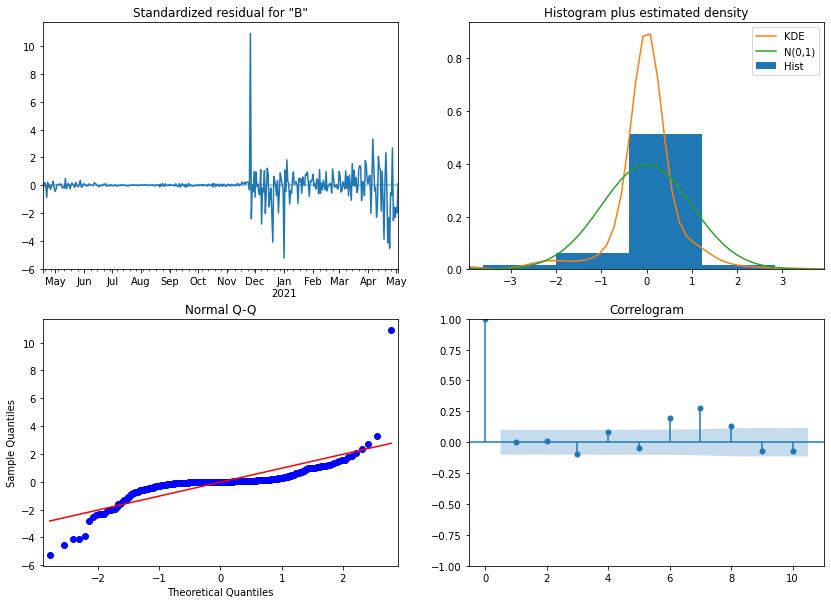

In [22]:
b_vaka_df = new_df["Bugünkü Vaka Sayısı"]
b_vaka_df = pd.DataFrame(b_vaka_df)

results = auto_arima(b_vaka_df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', 
                     suppress_warnings=True, stepwise=True)


mod = sm.tsa.statespace.SARIMAX(b_vaka_df,
                                order=results.order,
                                seasonal_order=results.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_vaka = mod.fit()


results_vaka.plot_diagnostics(figsize=(14,10))
plt.show()

### GÜNLÜK HASTA SAYISI

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5856.269, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5723.680, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5858.266, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5679.519, Time=0.73 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.17 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.92 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5681.586, Time=0.59 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=5678.079, Time=0.81 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=5721.523, Time=0.39 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=3.08 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.01 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=5679.018, Time=0.94 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=5670.6

D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


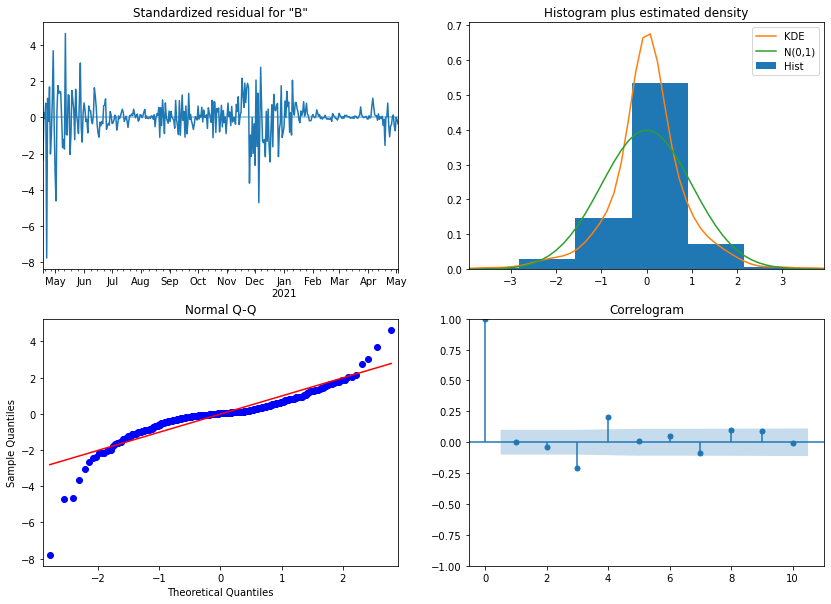

In [23]:
b_hasta_df = new_df["Bugünkü Hasta Sayısı"]
b_hasta_df = pd.DataFrame(b_hasta_df)

results = auto_arima(b_hasta_df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', 
                     suppress_warnings=True, stepwise=True)

mod = sm.tsa.statespace.SARIMAX(b_hasta_df,
                                order=results.order,
                                seasonal_order=results.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_hasta = mod.fit()

results_hasta.plot_diagnostics(figsize=(14,10))
plt.show()

### GÜNLÜK VEFAT SAYISI

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2794.260, Time=0.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2918.295, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2863.995, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2810.304, Time=0.47 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2917.807, Time=0.18 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=1.02 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=2.23 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=2859.088, Time=0.57 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=2793.001, Time=3.33 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=inf, Time=4.74 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=2792.885, Time=3.49 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=2822.232, Time=1.14 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.86 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.80 sec
 ARIMA(2,1,1)(2,1,1)[12]             : AIC=i

D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


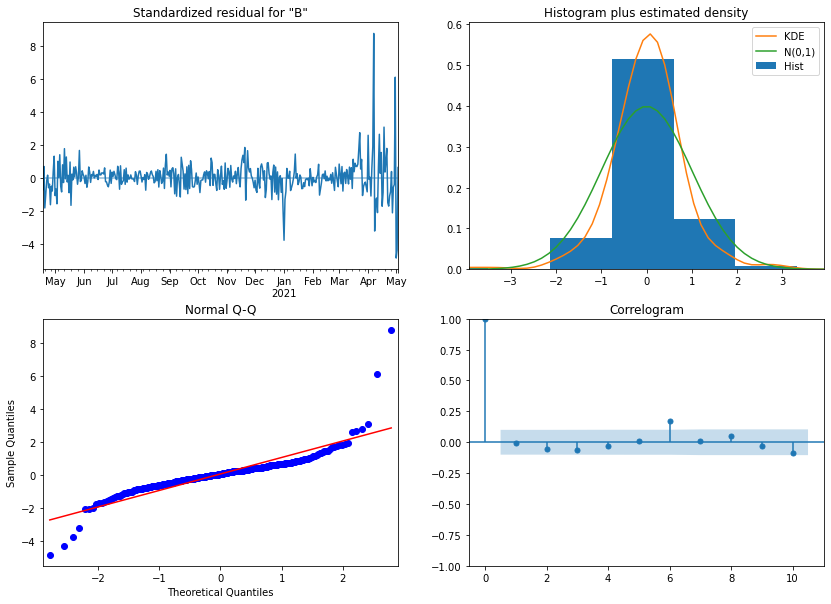

In [24]:
b_vefat_df = new_df["Bugünkü Vefat Sayısı"]
b_vefat_df = pd.DataFrame(b_vefat_df)

results = auto_arima(b_vefat_df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', 
                     suppress_warnings=True, stepwise=True)

mod = sm.tsa.statespace.SARIMAX(b_vefat_df,
                                order=results.order,
                                seasonal_order=results.seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_vefat = mod.fit()


results_vefat.plot_diagnostics(figsize=(14,10))
plt.show()

### GERÇEK VE ÖNGÖRÜLEN DEĞERLERİN KARŞILAŞTIRILMASI

In [25]:
#BUGÜNKÜ VAKA SAYISI
pred_vaka = results_vaka.get_prediction(start = pd.to_datetime('2020-03-11'), dynamic=False)
pred_vaka_ci = pred_vaka.conf_int()

pred_vaka_ci['Predicted'] = (pred_vaka_ci['lower Bugünkü Vaka Sayısı'] + pred_vaka_ci['upper Bugünkü Vaka Sayısı'])/2
pred_vaka_ci['Observed'] = b_vaka_df['Bugünkü Vaka Sayısı']
pred_vaka_ci['Diff, %%'] = ((pred_vaka_ci['Predicted'] / pred_vaka_ci['Observed'])-1) * 100
pred_vaka_ci.head()

,lower Bugünkü Vaka Sayısı,upper Bugünkü Vaka Sayısı,Predicted,Observed,"Diff, %%"
2020-03-11,-3394.757202,3394.757202,0.000000,1,-100.000000
2020-03-12,-4890.759146,4892.926378,1.083616,0,inf
2020-03-13,-4896.317575,4895.903149,-0.207213,4,-105.180327
2020-03-14,-4891.282995,4900.951539,4.834272,1,383.427180
2020-03-15,-4895.715694,4896.518863,0.401585,12,-96.653461


In [26]:
#BUGÜNKÜ HASTA SAYISI
pred_hasta = results_hasta.get_prediction(start=pd.to_datetime('2020-03-11'), dynamic=False)
pred_hasta_ci = pred_hasta.conf_int()

pred_hasta_ci['Predicted'] = (pred_hasta_ci['lower Bugünkü Hasta Sayısı'] + pred_hasta_ci['upper Bugünkü Hasta Sayısı'])/2
pred_hasta_ci['Observed'] = b_hasta_df['Bugünkü Hasta Sayısı']
pred_hasta_ci['Diff, %%'] = ((pred_hasta_ci['Predicted'] / pred_hasta_ci['Observed'])-1) * 100
pred_hasta_ci.head()

,lower Bugünkü Hasta Sayısı,upper Bugünkü Hasta Sayısı,Predicted,Observed,"Diff, %%"
2020-03-11,-3394.757202,3394.757202,0.0,0,NaN
2020-03-12,-3180.444139,3180.444139,0.0,0,NaN
2020-03-13,-3158.311384,3158.311384,0.0,0,NaN
2020-03-14,-3155.211266,3155.211266,0.0,0,NaN
2020-03-15,-3154.771571,3154.771571,0.0,0,NaN


In [27]:
#BUGÜNKÜ VEFAT SAYISI
pred_vefat = results_vefat.get_prediction(start=pd.to_datetime('2020-03-11'), dynamic=False)
pred_vefat_ci = pred_vefat.conf_int()

pred_vefat_ci['Predicted'] = (pred_vefat_ci['lower Bugünkü Vefat Sayısı'] + pred_vefat_ci['upper Bugünkü Vefat Sayısı'])/2
pred_vefat_ci['Observed'] = b_vefat_df['Bugünkü Vefat Sayısı']
pred_vefat_ci['Diff, %%'] = ((pred_vefat_ci['Predicted'] / pred_vefat_ci['Observed'])-1) * 100
pred_vefat_ci.head()

,lower Bugünkü Vefat Sayısı,upper Bugünkü Vefat Sayısı,Predicted,Observed,"Diff, %%"
2020-03-11,-3394.757202,3394.757202,0.0,0,NaN
2020-03-12,-3154.694610,3154.694610,0.0,0,NaN
2020-03-13,-3126.162678,3126.162678,0.0,0,NaN
2020-03-14,-3122.307016,3122.307016,0.0,0,NaN
2020-03-15,-3121.777487,3121.777487,0.0,0,NaN


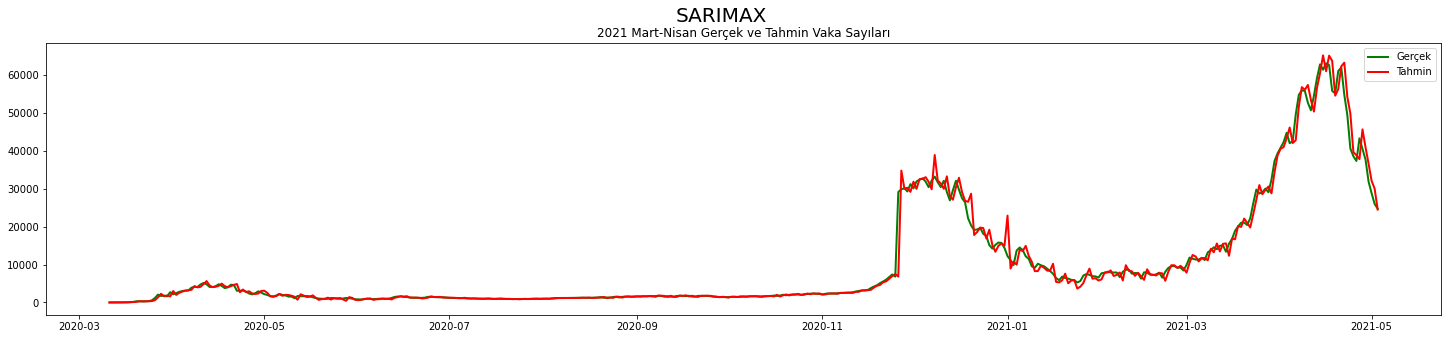

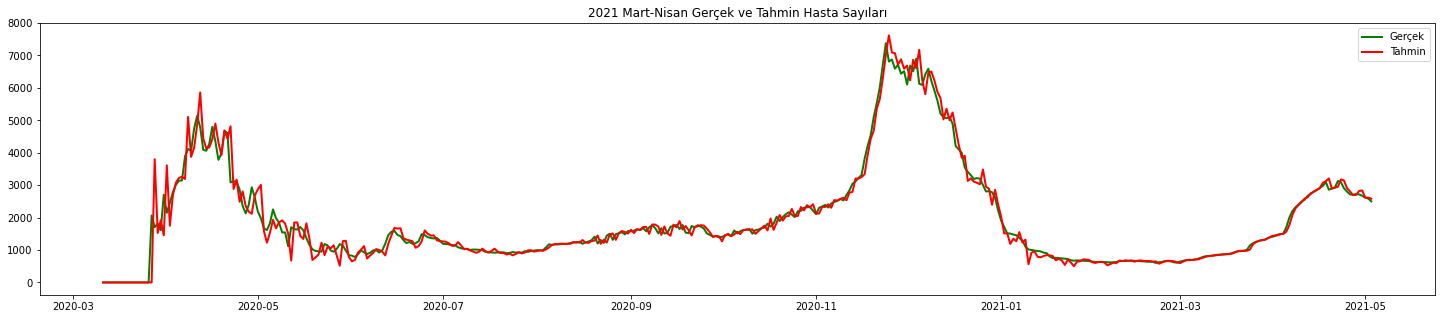

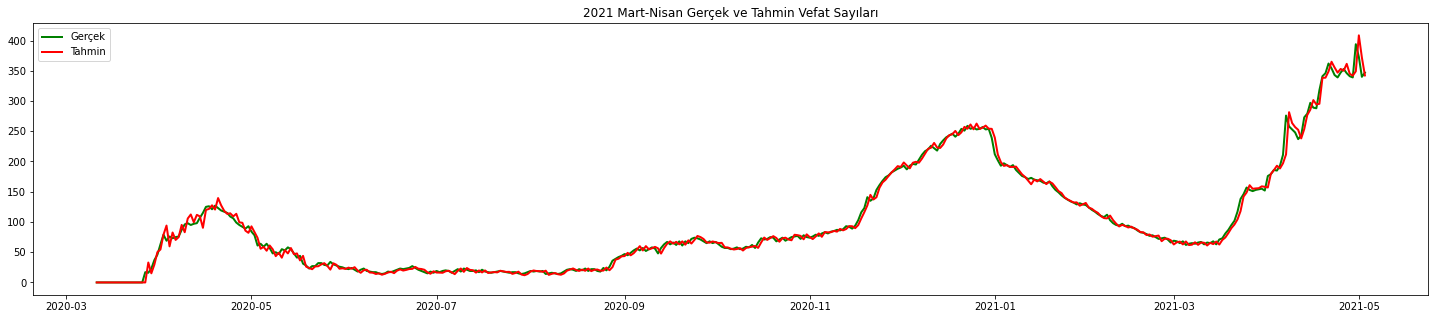

In [28]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
plt.title("2021 Mart-Nisan Gerçek ve Tahmin Vaka Sayıları")
ax.plot(pred_vaka_ci['Observed'],lw=2,color="#008000")
ax.plot(pred_vaka_ci['Predicted'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/SARIMAX.png')

fig, ax = plt.subplots(figsize=(25,5))
plt.title("2021 Mart-Nisan Gerçek ve Tahmin Hasta Sayıları")
ax.plot(pred_hasta_ci['Observed'],lw=2,color="#008000")
ax.plot(pred_hasta_ci['Predicted'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

fig, ax = plt.subplots(figsize=(25,5))
plt.title("2021 Mart-Nisan Gerçek ve Tahmin Vefat Sayıları")
ax.plot(pred_vefat_ci['Observed'],lw=2,color="#008000")
ax.plot(pred_vefat_ci['Predicted'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
plt.show()

### İLERİ TARİHLİ TAHMİNLEME

In [29]:
from dateutil.relativedelta import relativedelta

In [30]:
#BUGÜNKÜ VAKA SAYISI
pred_vaka = results_vaka.get_forecast(steps=4)

value = pred_vaka.predicted_mean.copy() 
value.index = pd.DatetimeIndex([(pd.to_datetime("today") + relativedelta(months = 1)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 2)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 3)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 4)).strftime("%Y-%m-%d")])
value = pd.DataFrame(value)
value.columns = ["Vaka Tahmin"]

deneme = value.copy()
deneme.columns=["Bugünkü Vaka Sayısı"]
dff_vaka = pd.concat([b_vaka_df, deneme])

In [31]:
#BUGÜNKÜ HASTA SAYISI
pred_hasta = results_hasta.get_forecast(steps=4)

value = pred_hasta.predicted_mean.copy() 
value.index = pd.DatetimeIndex([(pd.to_datetime("today") + relativedelta(months = 1)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 2)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 3)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 4)).strftime("%Y-%m-%d")])
value = pd.DataFrame(value)
value.columns = ["Hasta Tahmin"]

deneme = value.copy()
deneme.columns=["Bugünkü Hasta Sayısı"]
dff_hasta = pd.concat([b_hasta_df, deneme])

In [32]:
#BUGÜNKÜ VEFAT SAYISI
pred_vefat = results_vefat.get_forecast(steps=4)

value = pred_vefat.predicted_mean.copy() 
value.index = pd.DatetimeIndex([(pd.to_datetime("today") + relativedelta(months = 1)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 2)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 3)).strftime("%Y-%m-%d"),
                                (pd.to_datetime("today") + relativedelta(months = 4)).strftime("%Y-%m-%d")])
value = pd.DataFrame(value)
value.columns = ["Vefat Tahmin"]

deneme = value.copy()
deneme.columns=["Bugünkü Vefat Sayısı"]
dff_vefat = pd.concat([b_vefat_df, deneme])

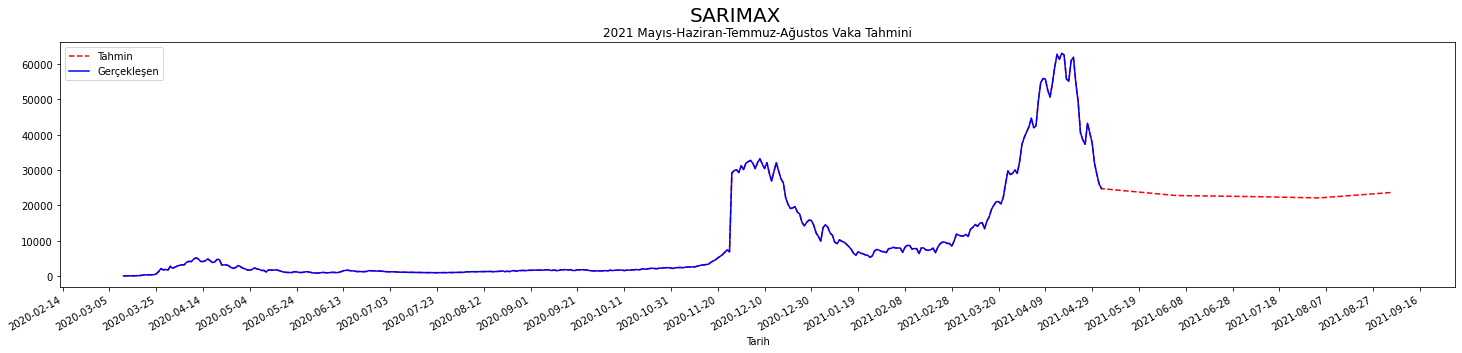

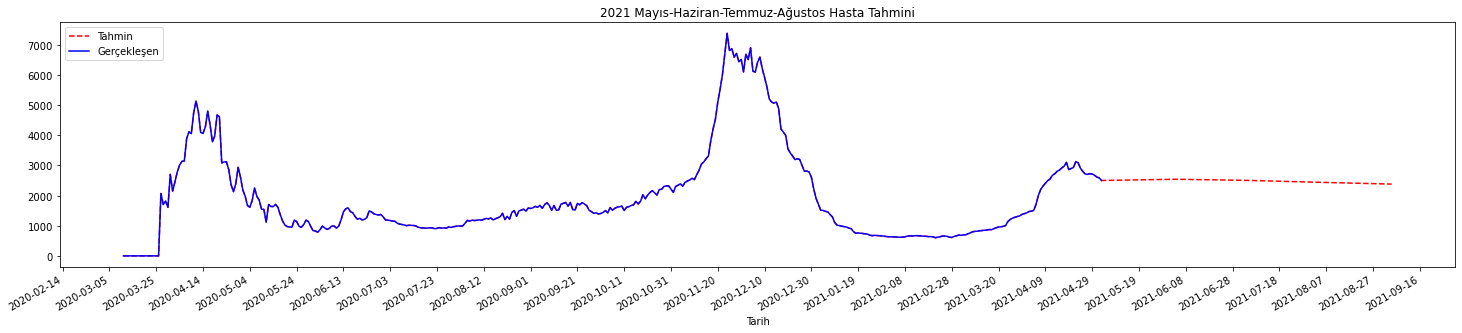

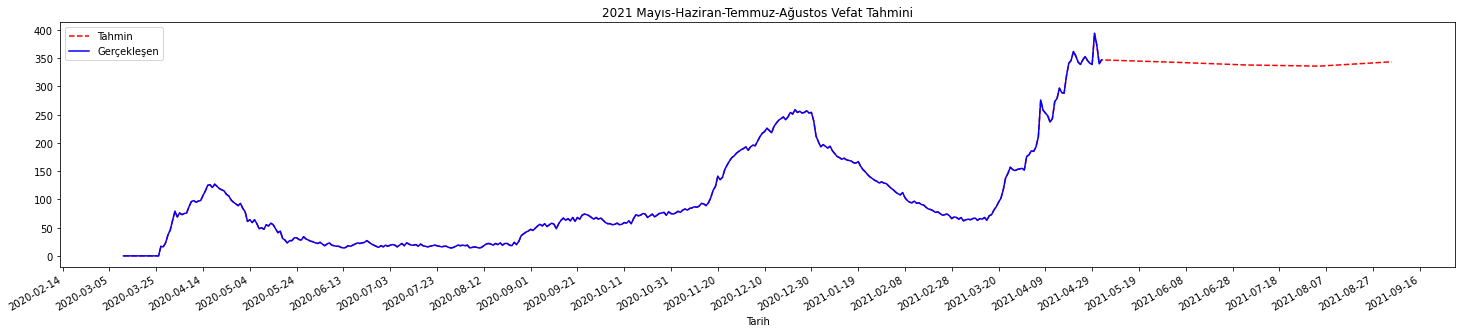

In [33]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SARIMAX', fontsize = 20)
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
dff_vaka["Bugünkü Vaka Sayısı"].plot(title = "2021 Mayıs-Haziran-Temmuz-Ağustos Vaka Tahmini", color = "r", marker = ".", ms=0, ls="--")
b_vaka_df["Bugünkü Vaka Sayısı"].plot(color = "b" , marker = ".", ms = 0, ls = "-")
plt.legend(["Tahmin","Gerçekleşen"], loc="upper left")


fig, ax = plt.subplots(figsize=(25,5))
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
dff_hasta["Bugünkü Hasta Sayısı"].plot(title = "2021 Mayıs-Haziran-Temmuz-Ağustos Hasta Tahmini", color = "r", marker = ".", ms=0, ls="--")
b_hasta_df["Bugünkü Hasta Sayısı"].plot(color = "b" , marker = ".", ms = 0, ls = "-")
plt.legend(["Tahmin","Gerçekleşen"], loc="upper left")


fig, ax = plt.subplots(figsize=(25,5))
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
dff_vefat["Bugünkü Vefat Sayısı"].plot(title = "2021 Mayıs-Haziran-Temmuz-Ağustos Vefat Tahmini", color = "r", marker = ".", ms=0, ls="--")
b_vefat_df["Bugünkü Vefat Sayısı"].plot(color = "b" , marker = ".", ms = 0, ls = "-")
plt.legend(["Tahmin","Gerçekleşen"], loc="upper left")

In [34]:
sarimax_rmse = np.sqrt(results_vaka.mse)
sarimax_mae = results_vaka.mae

print("RMSE :", sarimax_rmse)
print("MAE :", sarimax_mae)

RMSE : 1954.963768621986
MAE : 833.0459825200558


## MAKİNE ÖĞRENMESİ

In [35]:
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [36]:
ml_df = df.copy()
ml_df['Tarih'] = pd.to_datetime(ml_df['Tarih'], format='%Y-%m-%d')
ml_df['Gün'] = ml_df['Tarih'].dt.day
ml_df['Ay'] = ml_df['Tarih'].dt.month
ml_df['Yıl'] = ml_df['Tarih'].dt.year

ml_df.index = ml_df["Tarih"]
ml_df.index = pd.DatetimeIndex(ml_df.index)
ml_df.drop(["Tarih"], axis=1, inplace=True)
ml_df.head()

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı,Gün,Ay,Yıl
Tarih,,,,,,,,,,,,,,
2020-03-11,0,1,0,0.0,0,0,1,0,0,0,0,11,3,2020
2020-03-12,0,1,0,0.0,0,0,0,0,0,0,0,12,3,2020
2020-03-13,0,5,0,0.0,0,0,4,0,0,0,0,13,3,2020
2020-03-14,0,6,0,0.0,0,0,1,0,0,0,0,14,3,2020
2020-03-15,0,18,0,0.0,0,0,12,0,0,0,0,15,3,2020


In [37]:
ml_df.corr()

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı,Gün,Ay,Yıl
Toplam Test Sayısı,1.000000,0.962160,0.993714,-0.128795,0.596656,0.961396,0.757813,0.052493,0.896627,0.742391,0.745228,0.001876,-0.283751,0.875464
Toplam Vaka Sayısı,0.962160,1.000000,0.977356,-0.243079,0.473361,0.996602,0.766243,-0.046305,0.827301,0.751677,0.821509,0.016077,-0.433547,0.903095
Toplam Vefat Sayısı,0.993714,0.977356,1.000000,-0.174710,0.535926,0.978723,0.739123,-0.007786,0.863265,0.721606,0.748053,0.000990,-0.352270,0.905529
Hastalarda Zatürre Oranı (%),-0.128795,-0.243079,-0.174710,1.000000,0.008066,-0.240232,-0.238293,-0.074110,0.001747,-0.178683,-0.216459,-0.057414,0.436858,-0.252615
Ağır Hasta Sayısı,0.596656,0.473361,0.535926,0.008066,1.000000,0.451034,0.623914,0.644949,0.782134,0.784612,0.517555,-0.002733,0.404119,0.232074
Toplam İyileşen Hasta Sayısı,0.961396,0.996602,0.978723,-0.240232,0.451034,1.000000,0.731679,-0.083755,0.807877,0.724536,0.798494,0.017402,-0.455936,0.918104
Bugünkü Vaka Sayısı,0.757813,0.766243,0.739123,-0.238293,0.623914,0.731679,1.000000,0.383827,0.852797,0.825307,0.835815,-0.008196,-0.087529,0.547738
Bugünkü Hasta Sayısı,0.052493,-0.046305,-0.007786,-0.074110,0.644949,-0.083755,0.383827,1.000000,0.319252,0.510411,0.189540,0.004853,0.519974,-0.262661
Bugünkü Test Sayısı,0.896627,0.827301,0.863265,0.001747,0.782134,0.807877,0.852797,0.319252,1.000000,0.853865,0.779162,0.005275,0.036865,0.636781
Bugünkü Vefat Sayısı,0.742391,0.751677,0.721606,-0.178683,0.784612,0.724536,0.825307,0.510411,0.853865,1.000000,0.844807,0.041382,-0.010622,0.499460


In [38]:
X = ml_df.drop(["Bugünkü Vaka Sayısı"], axis=1)
y = ml_df["Bugünkü Vaka Sayısı"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [39]:
pred_vaka_ci = pred_vaka_ci[pred_vaka_ci.index.isin(y_test.index)]

### XGBOOST

In [40]:
import xgboost as xg

In [41]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 20, seed = 123)
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=8, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [42]:
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_r.predict(X_test)))
xgb_mae = mean_absolute_error(y_test, xgb_r.predict(X_test))

print("RMSE :", xgb_rmse)
print("MAE :", xgb_mae)

RMSE : 1106.2670886169478
MAE : 528.1275391351609


D:\C\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
D:\C\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [43]:
xgb_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": xgb_r.predict(X_test)}).sort_index()
xgb_tahmin_df

D:\C\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,47.034927
2020-03-15,12,47.034927
2020-03-16,29,47.034927
2020-03-17,51,47.034927
2020-03-21,277,304.941437
...,...,...
2021-03-25,28731,29694.720703
2021-04-04,41998,42742.976562
2021-04-22,54791,57711.269531


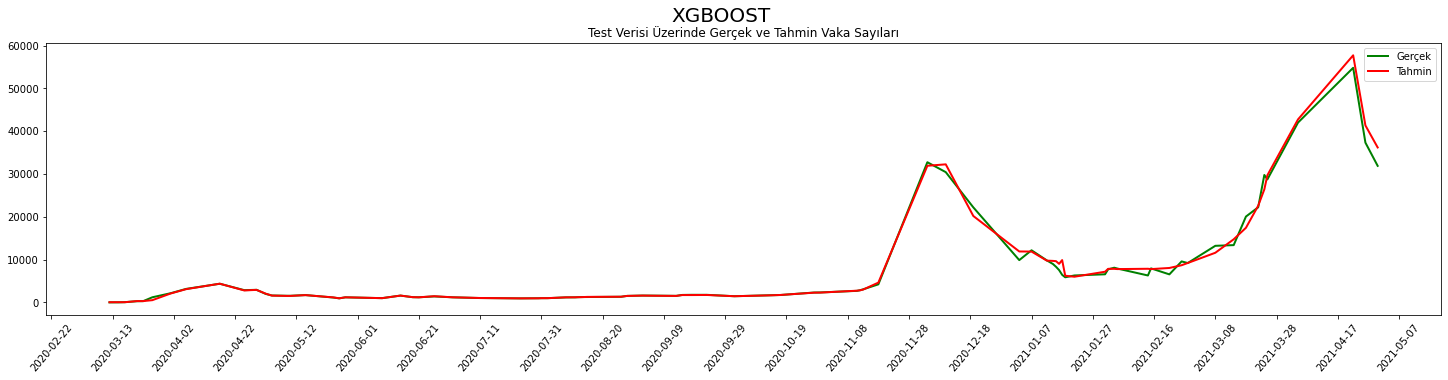

In [44]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('XGBOOST', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(xgb_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(xgb_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/XGBoost.png')

### SKLEARN

In [45]:
sklearn_model = LinearRegression().fit(X_train,y_train)

In [46]:
sklearn_rmse = np.sqrt(mean_squared_error(y_test, sklearn_model.predict(X_test)))
sklearn_mae = mean_absolute_error(y_test, sklearn_model.predict(X_test))

print("RMSE :", sklearn_rmse)
print("MAE :", sklearn_mae)

RMSE : 4036.107379931401
MAE : 2944.485979267884


In [47]:
sklearn_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": sklearn_model.predict(X_test)}).sort_index()
sklearn_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,87.852244
2020-03-15,12,-545.304958
2020-03-16,29,-755.972056
2020-03-17,51,-964.844302
2020-03-21,277,-1766.777358
...,...,...
2021-03-25,28731,26966.494139
2021-04-04,41998,35935.753583
2021-04-22,54791,55569.532161


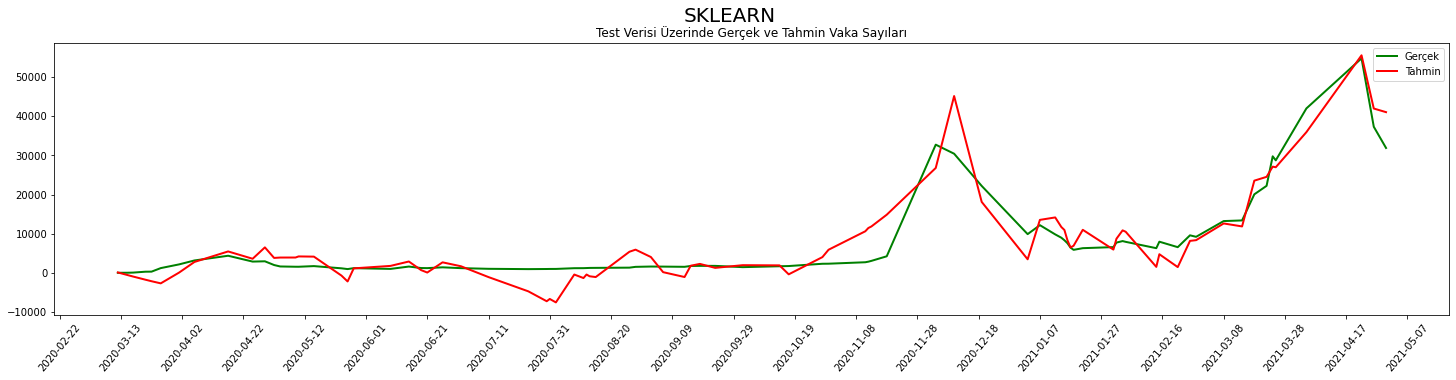

In [48]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('SKLEARN', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(sklearn_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(sklearn_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/Sklearn.png')

### DESICION TREE REGRESSOR

In [49]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor().fit(X_train,y_train)

In [50]:
dt_regressor_rmse = np.sqrt(mean_squared_error(y_test, dt_regressor.predict(X_test)))
dt_regressor_mae = mean_absolute_error(y_test, dt_regressor.predict(X_test))

print("RMSE :", dt_regressor_rmse)
print("MAE :", dt_regressor_mae)

RMSE : 2068.234921491316
MAE : 801.7857142857143


In [51]:
dt_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": dt_regressor.predict(X_test)}).sort_index()
dt_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,1.0
2020-03-15,12,1.0
2020-03-16,29,1.0
2020-03-17,51,93.0
2020-03-21,277,311.0
...,...,...
2021-03-25,28731,32404.0
2021-04-04,41998,42551.0
2021-04-22,54791,61967.0


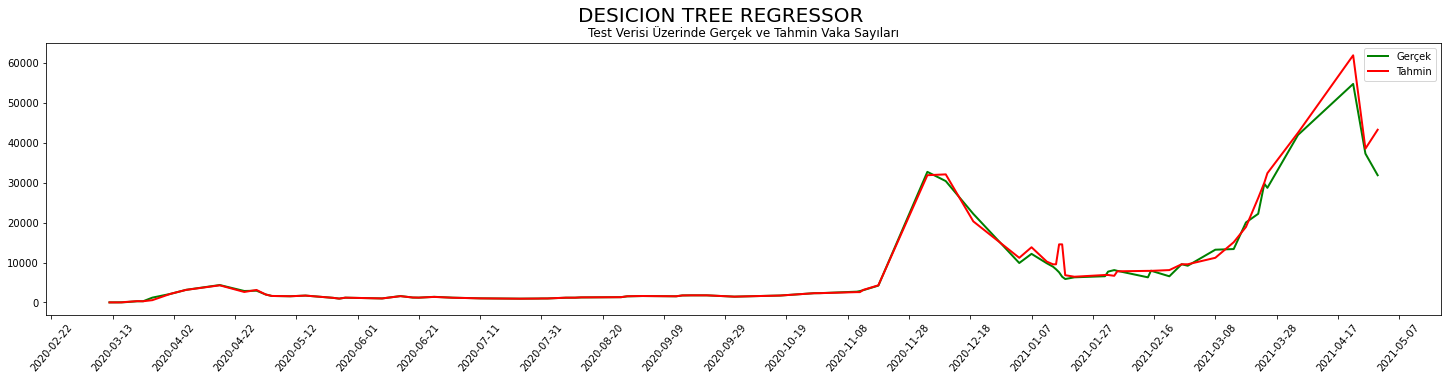

In [52]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('DESICION TREE REGRESSOR', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(dt_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(dt_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/DecisionTree.png')

### DEEP NEURAL NETWORK

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [54]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = X_train, X_test, y_train, y_test

In [55]:
scaler = MinMaxScaler()

X_train_tf = scaler.fit_transform(X_train_tf)
X_test_tf = scaler.transform(X_test_tf)

In [56]:
tf_model = Sequential()

tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))
tf_model.add(Dense(13, activation = "relu"))

tf_model.add(Dense(1))

tf_model.compile(optimizer = "adam", loss = "mse")

tf_model.fit(x = X_train_tf, y = y_train_tf, validation_data = (X_test_tf, y_test_tf), batch_size = 50, epochs = 500)

Epoch 1/500
7/7 [==============================] - 5s 543ms/step - loss: 364814064.0000 - val_loss: 166841584.0000
Epoch 2/500
7/7 [==============================] - 0s 17ms/step - loss: 353194920.0000 - val_loss: 166841120.0000
Epoch 3/500
7/7 [==============================] - 0s 16ms/step - loss: 356305416.0000 - val_loss: 166840448.0000
Epoch 4/500
7/7 [==============================] - 0s 17ms/step - loss: 366004420.0000 - val_loss: 166839392.0000
Epoch 5/500
7/7 [==============================] - 0s 16ms/step - loss: 318715692.0000 - val_loss: 166837584.0000
Epoch 6/500
7/7 [==============================] - 0s 17ms/step - loss: 338424844.0000 - val_loss: 166833936.0000
Epoch 7/500
7/7 [==============================] - 0s 17ms/step - loss: 322917612.0000 - val_loss: 166826016.0000
Epoch 8/500
7/7 [==============================] - 0s 17ms/step - loss: 302858277.0000 - val_loss: 166808864.0000
Epoch 9/500
7/7 [==============================] - 0s 18ms/step - loss: 395838184.0000 

<AxesSubplot:>

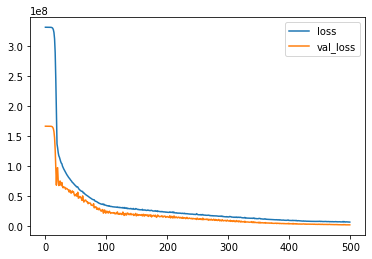

In [57]:
kayipVeri = pd.DataFrame(tf_model.history.history)
kayipVeri.plot()

In [58]:
tahmin_dizi = tf_model.predict(X_test_tf)

trainLoss = tf_model.evaluate(X_train_tf, y_train_tf, verbose = 0)
testLoss = tf_model.evaluate(X_test_tf, y_test_tf, verbose = 0)

print("Train Loss : ", trainLoss)
print("Test Loss : ", testLoss)

Train Loss :  6799140.0
Test Loss :  2208752.0


In [59]:
tf_rmse = np.sqrt(mean_squared_error(y_test_tf, tf_model.predict(X_test_tf)))
tf_mae = mean_absolute_error(y_test_tf, tf_model.predict(X_test_tf))

print("RMSE :", tf_rmse)
print("MAE :", tf_mae)

RMSE : 1486.1871154080059
MAE : 911.2727559407552


In [60]:
tf_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test_tf, "Tahmin Vaka Test": tf_model.predict(X_test_tf).reshape(-1)}).sort_index()
tf_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,1022.119202
2020-03-15,12,1022.119202
2020-03-16,29,1022.119202
2020-03-17,51,1022.119202
2020-03-21,277,1022.119202
...,...,...
2021-03-25,28731,28496.701172
2021-04-04,41998,40225.847656
2021-04-22,54791,56144.675781


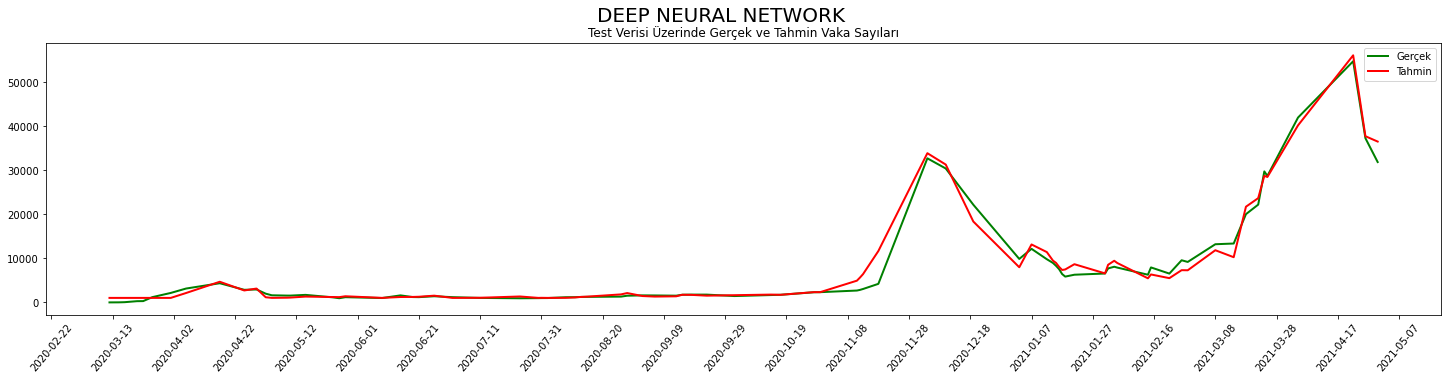

In [61]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('DEEP NEURAL NETWORK', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(tf_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(tf_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/Tensorflow.png')

### GRADIENT BOOSTING REGRESSOR

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
params = {'n_estimators': 500,
          'max_depth': 10,
          'min_samples_split': 20,
          'learning_rate': 0.9,
          'loss': 'ls'}

gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.9, max_depth=10, min_samples_split=20,
                          n_estimators=500)

In [64]:
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_model.predict(X_test)))
gbr_mae = mean_absolute_error(y_test, gbr_model.predict(X_test))

print("RMSE :", gbr_rmse)
print("MAE :", gbr_mae)

RMSE : 2042.6057399430497
MAE : 811.5293781019817


In [65]:
gbr_tahmin_df = pd.DataFrame({"Gerçek Vaka Test": y_test, "Tahmin Vaka Test": gbr_model.predict(X_test)}).sort_index()
gbr_tahmin_df

,Gerçek Vaka Test,Tahmin Vaka Test
Tarih,,
2020-03-12,0,2.612305
2020-03-15,12,3.634928
2020-03-16,29,9.124406
2020-03-17,51,9.124406
2020-03-21,277,300.876036
...,...,...
2021-03-25,28731,30051.886810
2021-04-04,41998,43011.769388
2021-04-22,54791,56037.665631


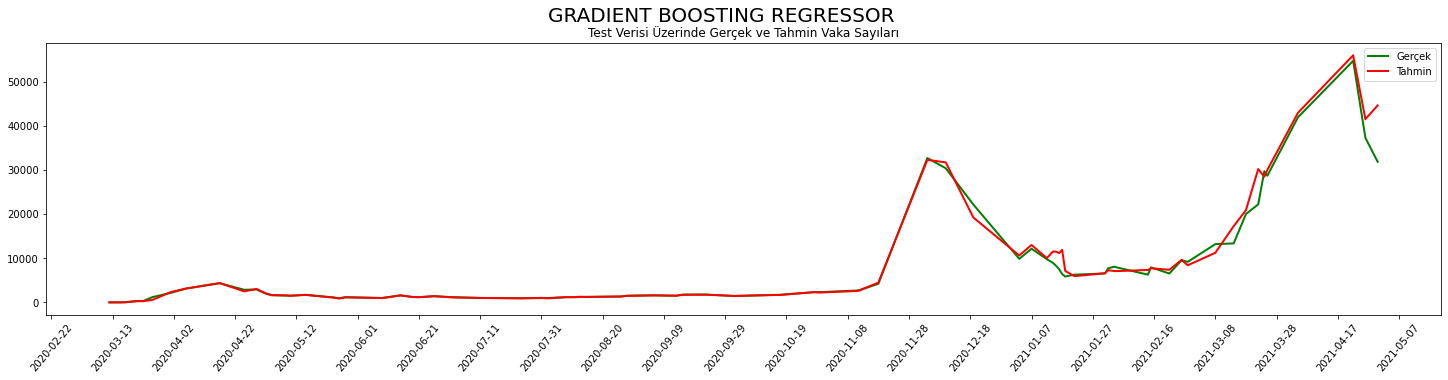

In [66]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('GRADIENT BOOSTING REGRESSOR', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(gbr_tahmin_df['Gerçek Vaka Test'],lw=2,color="#008000")
ax.plot(gbr_tahmin_df['Tahmin Vaka Test'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])
fig.savefig('plots/Gradient.png')

# MODELLERİN KARŞILAŞTIRILMASI

## RMSE ve MAE Değerlerinin Karşılaştırılması

In [67]:
model_comp = pd.DataFrame({'Models': ["SARIMAX", "XGBOOST", "SKLEARN", "DESICION TREE", "GRADIENT BOOSTING", "DEEP NEURAL NETWORK"], 
                           'RMSE': [sarimax_rmse, xgb_rmse, sklearn_rmse, dt_regressor_rmse, gbr_rmse, tf_rmse],
                           'MAE': [sarimax_mae, xgb_mae, sklearn_mae, dt_regressor_mae, gbr_mae, tf_mae]})
model_comp = model_comp.sort_values(by="RMSE",axis=0, ascending = False).reset_index(drop=True)
model_comp

,Models,RMSE,MAE
0,SKLEARN,4036.107380,2944.485979
1,DESICION TREE,2068.234921,801.785714
2,GRADIENT BOOSTING,2042.605740,811.529378
3,SARIMAX,1954.963769,833.045983
4,DEEP NEURAL NETWORK,1486.187115,911.272756
5,XGBOOST,1106.267089,528.127539


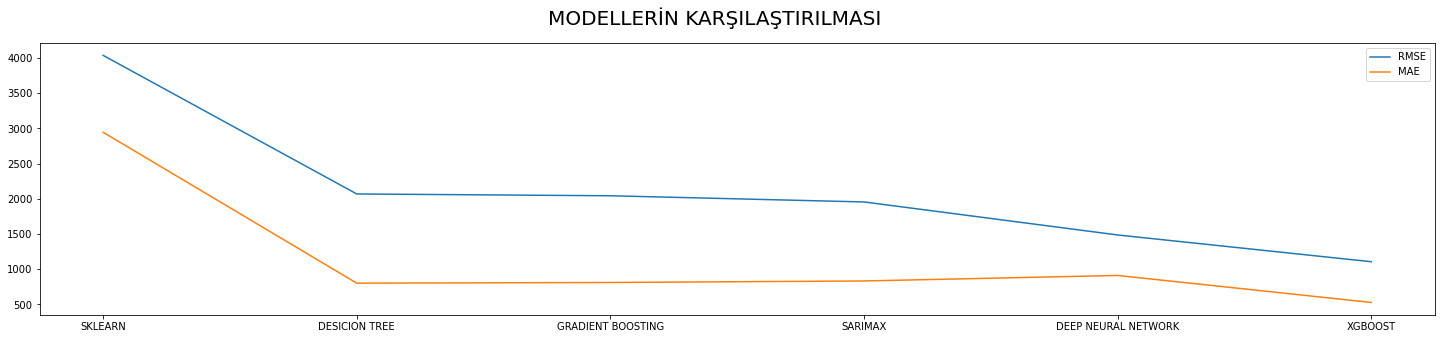

In [68]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('MODELLERİN KARŞILAŞTIRILMASI', fontsize = 20)
plt.plot(model_comp['Models'], model_comp['RMSE'], label = "RMSE")
plt.plot(model_comp['Models'], model_comp['MAE'], label = "MAE")
plt.legend()
plt.show()

## Tahminleme Karşılaştırılması

In [69]:
frames = [xgb_tahmin_df["Gerçek Vaka Test"], pred_vaka_ci["Predicted"], xgb_tahmin_df["Tahmin Vaka Test"], 
          sklearn_tahmin_df["Tahmin Vaka Test"], dt_tahmin_df["Tahmin Vaka Test"], 
          gbr_tahmin_df["Tahmin Vaka Test"], tf_tahmin_df["Tahmin Vaka Test"]]

model_comp_ = pd.concat(frames, axis=1)
model_comp_.columns = ["Gerçek Değerler", "SARIMAX", "XGBoost", "Sklearn", "Decision Tree", "Gradient Boosting", "Deep Neural Network"]
model_comp_

,Gerçek Değerler,SARIMAX,XGBoost,Sklearn,Decision Tree,Gradient Boosting,Deep Neural Network
2020-03-12,0,1.083616,47.034927,87.852244,1.0,2.612305,1022.119202
2020-03-15,12,0.401585,47.034927,-545.304958,1.0,3.634928,1022.119202
2020-03-16,29,14.293100,47.034927,-755.972056,1.0,9.124406,1022.119202
2020-03-17,51,32.673236,47.034927,-964.844302,93.0,9.124406,1022.119202
2020-03-21,277,341.772700,304.941437,-1766.777358,311.0,300.876036,1022.119202
...,...,...,...,...,...,...,...
2021-03-25,28731,30955.505977,29694.720703,26966.494139,32404.0,30051.886810,28496.701172
2021-04-04,41998,46143.371679,42742.976562,35935.753583,42551.0,43011.769388,40225.847656
2021-04-22,54791,63256.951952,57711.269531,55569.532161,61967.0,56037.665631,56144.675781
2021-04-26,37312,38835.076570,41331.578125,41968.974296,38553.0,41553.249455,37762.082031


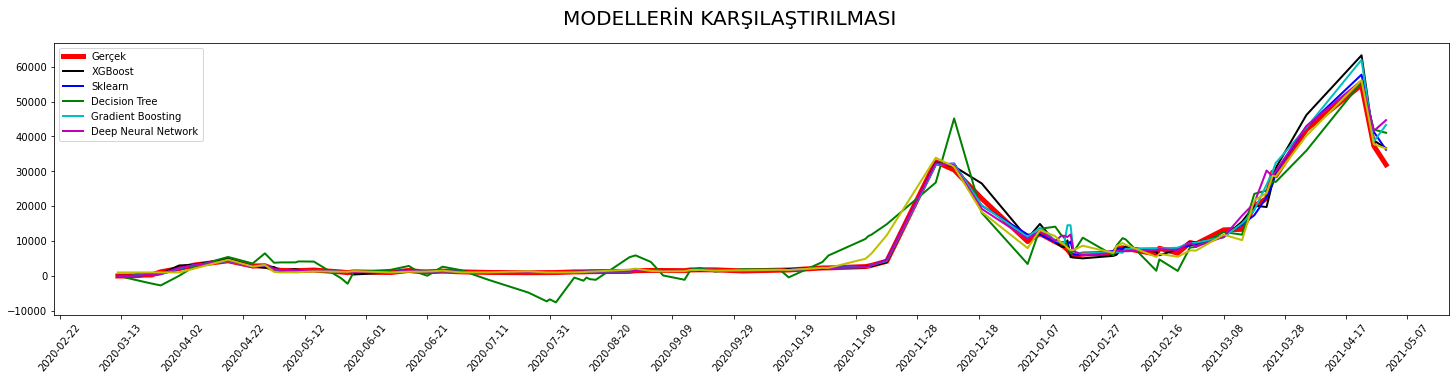

In [70]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('MODELLERİN KARŞILAŞTIRILMASI', fontsize = 20)
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(model_comp_['Gerçek Değerler'], lw=5, color="r")
ax.plot(model_comp_['SARIMAX'], lw=2, color="k")
ax.plot(model_comp_['XGBoost'], lw=2, color="b")
ax.plot(model_comp_['Sklearn'], lw=2, color="g")
ax.plot(model_comp_['Decision Tree'], lw=2, color="c")
ax.plot(model_comp_['Gradient Boosting'], lw=2, color="m")
ax.plot(model_comp_['Deep Neural Network'], lw=2, color="y")
ax.legend(['Gerçek','XGBoost', 'Sklearn', 'Decision Tree', 'Gradient Boosting', 'Deep Neural Network'])

| ![SARIMAX](plots/SARIMAX.png) | ![XGBoost](plots/XGBoost.png)
|:---:|:---:|

| ![Sklearn](plots\Sklearn.png) | ![DecisionTree](plots\DecisionTree.png)
|:---:|:---:|

| ![Gradient](plots\Gradient.png) | ![Tensorflow](plots\Tensorflow.png)
|:---:|:---:|